<a href="https://colab.research.google.com/github/RakeshYadavGit/machine_learning/blob/main/exp1_linear_regression_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
  
# Importing Data
from sklearn.datasets import load_boston
boston = load_boston()

In [ ]:

boston.data.shape

(506, 13)

In [ ]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [44]:
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data.drop(["CHAS","PTRATIO","DIS"],axis=1,inplace=True)
data.head(10)

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,1.0,296.0,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,2.0,242.0,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,2.0,242.0,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,3.0,222.0,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,3.0,222.0,396.90,5.33
5,0.02985,0.0,2.18,0.458,6.430,58.7,3.0,222.0,394.12,5.21
6,0.08829,12.5,7.87,0.524,6.012,66.6,5.0,311.0,395.60,12.43
7,0.14455,12.5,7.87,0.524,6.172,96.1,5.0,311.0,396.90,19.15
8,0.21124,12.5,7.87,0.524,5.631,100.0,5.0,311.0,386.63,29.93
9,0.17004,12.5,7.87,0.524,6.004,85.9,5.0,311.0,386.71,17.10


In [45]:
data['Price'] = boston.target
data.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,B,LSTAT,Price
0,0.00632,18.0,2.31,0.538,6.575,65.2,1.0,296.0,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,2.0,242.0,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,2.0,242.0,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,3.0,222.0,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,3.0,222.0,396.90,5.33,36.2


In [46]:
data.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,9.549407,408.237154,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,8.707259,168.537116,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.000000,187.000000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,4.000000,279.000000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,5.000000,330.000000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,24.000000,666.000000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,24.000000,711.000000,396.900000,37.970000,50.000000


In [47]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   ZN      506 non-null    float64
 2   INDUS   506 non-null    float64
 3   NOX     506 non-null    float64
 4   RM      506 non-null    float64
 5   AGE     506 non-null    float64
 6   RAD     506 non-null    float64
 7   TAX     506 non-null    float64
 8   B       506 non-null    float64
 9   LSTAT   506 non-null    float64
 10  Price   506 non-null    float64
dtypes: float64(11)
memory usage: 43.6 KB


In [48]:

x = data
y = boston.target

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2,
													random_state = 0)

print("xtrain shape : ", xtrain.shape)
print("xtest shape : ", xtest.shape)
print("ytrain shape : ", ytrain.shape)
print("ytest shape : ", ytest.shape)


xtrain shape :  (404, 11)
xtest shape :  (102, 11)
ytrain shape :  (404,)
ytest shape :  (102,)


In [49]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

y_pred = regressor.predict(xtest)


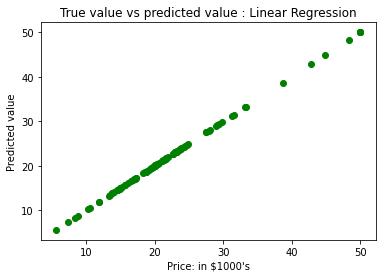

In [50]:
plt.scatter(ytest, y_pred, c = 'green')
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

In [51]:

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(ytest, y_pred)
mae = mean_absolute_error(ytest,y_pred)
print("Mean Square Error : ", mse)
print("Mean Absolute Error : ", mae)

Mean Square Error :  7.113205185960524e-28
Mean Absolute Error :  1.9853399969767504e-14
